# Milestone1 Submission 
`Dataset URL:` https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set?resource=download

## Imports and load file

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_raw = pd.read_csv("AirQuality.csv", sep=";")
df_raw.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## Quick inspection

In [17]:
df_raw.shape
df_raw.columns.tolist()
df_raw.info()
df_raw.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Unnamed: 16      9471
Unnamed: 15      9471
Date              114
Time              114
CO(GT)            114
C6H6(GT)          114
PT08.S2(NMHC)     114
PT08.S1(CO)       114
NMHC(GT)          114
PT08.S3(NOx)      114
NOx(GT)           114
NO2(GT)           114
PT08.S4(NO2)      114
T                 114
PT08.S5(O3)       114
AH                114
RH                114
dtype: int64

## Convert numeric-like columns

In [18]:
df = df_raw.copy()

# keep date/time columns aside
date_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
other_cols = [c for c in df.columns if c not in date_cols]

# convert others to numeric where possible (commas -> dots, coerce errors)
for c in other_cols:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(',', '.', regex=False), errors='coerce')

# replace -200 sentinel (common in this dataset) with NaN
df.replace(-200, np.nan, inplace=True)

# check missing after replacement
df.isnull().sum().sort_values(ascending=False)


Unnamed: 16      9471
Unnamed: 15      9471
NMHC(GT)         8557
CO(GT)           1797
NO2(GT)          1756
NOx(GT)          1753
T                 480
PT08.S2(NMHC)     480
PT08.S1(CO)       480
AH                480
PT08.S3(NOx)      480
C6H6(GT)          480
PT08.S4(NO2)      480
RH                480
PT08.S5(O3)       480
Date              114
Time              114
dtype: int64

## Parse Date + Time → Datetime index

In [19]:
# detect columns
date_col = next((c for c in df.columns if 'date' in c.lower()), None)
time_col = next((c for c in df.columns if 'time' in c.lower()), None)

if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')

if time_col is not None:
    df[time_col] = df[time_col].astype(str).str.replace('.', ':', regex=False)

# combine into Datetime
if date_col and time_col:
    df['Datetime'] = pd.to_datetime(df[date_col].dt.strftime("%Y-%m-%d") + ' ' + df[time_col], errors='coerce')
elif date_col:
    df['Datetime'] = df[date_col]
else:
    raise RuntimeError("No Date/Time column found — check your CSV.")

# drop rows where Datetime couldn't be parsed, set as index
df = df[~df['Datetime'].isnull()].copy()
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Datetime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Duplicates and missing summary

In [20]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
n = len(df)
missing = df.isnull().sum().sort_values(ascending=False)
pd.concat([missing, (missing / n * 100).round(2)], axis=1, keys=['missing_count','missing_percent'])


Duplicates: 0


,missing_count,missing_percent
Unnamed: 16,9357,100.00
Unnamed: 15,9357,100.00
NMHC(GT),8443,90.23
CO(GT),1683,17.99
NO2(GT),1642,17.55
NOx(GT),1639,17.52
T,366,3.91
PT08.S2(NMHC),366,3.91
PT08.S1(CO),366,3.91
AH,366,3.91


## Outlier summary

In [21]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_rows = []
for c in num_cols:
    s = df[c].dropna()
    if s.empty:
        outlier_rows.append({'column': c, 'outlier_count': 0, 'lower': None, 'upper': None})
        continue
    Q1 = s.quantile(0.25); Q3 = s.quantile(0.75); IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR; upper = Q3 + 1.5*IQR
    oc = int(((df[c] < lower) | (df[c] > upper)).sum())
    outlier_rows.append({'column': c, 'outlier_count': oc, 'lower': float(lower), 'upper': float(upper)})

pd.DataFrame(outlier_rows).sort_values('outlier_count', ascending=False)


,column,outlier_count,lower,upper
5,NOx(GT),435,-244.00000,668.00000
6,PT08.S3(NOx),241,190.75000,1436.75000
3,C6H6(GT),228,-10.00000,28.40000
0,CO(GT),215,-1.60000,5.60000
1,PT08.S1(CO),118,496.00000,1672.00000
7,NO2(GT),107,-18.00000,238.00000
8,PT08.S4(NO2),97,556.50000,2344.50000
9,PT08.S5(O3),93,-81.50000,2086.50000
4,PT08.S2(NMHC),65,162.25000,1688.25000
2,NMHC(GT),55,-278.00000,642.00000


## Demonstrate missing-value handling for one pollutant (example: CO(GT))

In [34]:
# method 1: drop rows where target is null
dropna_target = df.dropna(subset=[target])

# method 2: fill with constant
fill_const = df.copy()
fill_const[target] = fill_const[target].fillna(0)

# method 3: fill with mean / median / mode
fill_mean = df.copy()
fill_mean[target] = fill_mean[target].fillna(df[target].mean())

fill_median = df.copy()
fill_median[target] = fill_median[target].fillna(df[target].median())

mode_val = df[target].mode()[0] if not df[target].mode().empty else np.nan
fill_mode = df.copy()
fill_mode[target] = fill_mode[target].fillna(mode_val)

# method 4: time interpolation
interp_time = df.copy()
interp_time[target] = interp_time[target].interpolate(method='time')

# method 5: forward & backward fill
ffill_df = df.copy()
ffill_df[target] = ffill_df[target].ffill()

bfill_df = df.copy()
bfill_df[target] = bfill_df[target].bfill()

pd.DataFrame([
    ('dropna_target', int(dropna_target[target].isnull().sum())),
    ('fill_const', int(fill_const[target].isnull().sum())),
    ('fill_mean', int(fill_mean[target].isnull().sum())),
    ('fill_median', int(fill_median[target].isnull().sum())),
    ('fill_mode', int(fill_mode[target].isnull().sum())),
    ('interp_time', int(interp_time[target].isnull().sum())),
    ('ffill', int(ffill_df[target].isnull().sum())),
    ('bfill', int(bfill_df[target].isnull().sum()))
], columns=['method','missing_after']).set_index('method')

,missing_after
method,
dropna_target,0
fill_const,0
fill_mean,0
fill_median,0
fill_mode,0
interp_time,0
ffill,0
bfill,0


## Example: capping outliers for target

In [23]:
s = df[target].dropna()
Q1 = s.quantile(0.25); Q3 = s.quantile(0.75); IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df_capped = df.copy()
df_capped[target] = df_capped[target].clip(lower, upper)
df_capped[[target]].describe()


,CO(GT)
count,7674.000000
mean,2.118256
std,1.339813
min,0.100000
25%,1.100000
50%,1.800000
75%,2.900000
max,5.600000


## Time-series:

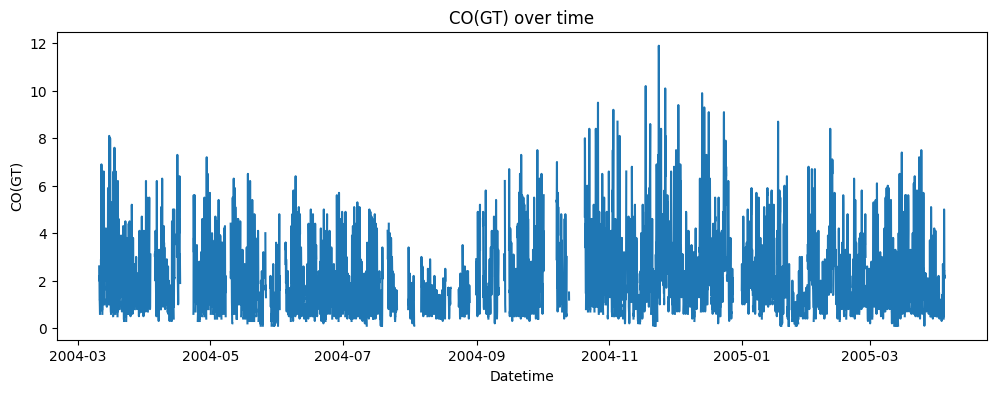

In [24]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df[target])
plt.title(f"{target} over time")
plt.xlabel("Datetime")
plt.ylabel(target)
plt.show()


## Histogram

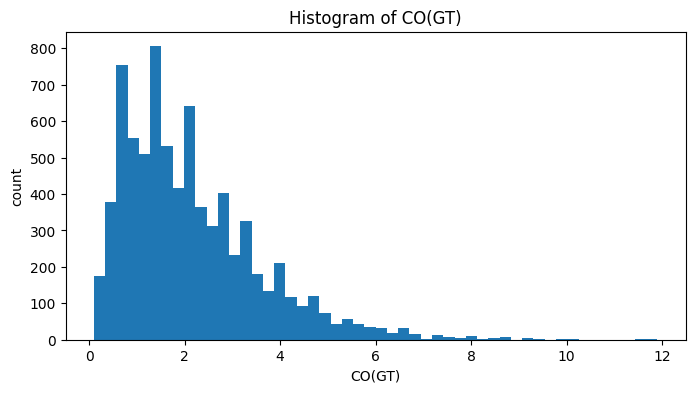

In [25]:
plt.figure(figsize=(8,4))
plt.hist(df[target].dropna(), bins=50)
plt.title(f"Histogram of {target}")
plt.xlabel(target)
plt.ylabel("count")
plt.show()


## Boxplot by hour

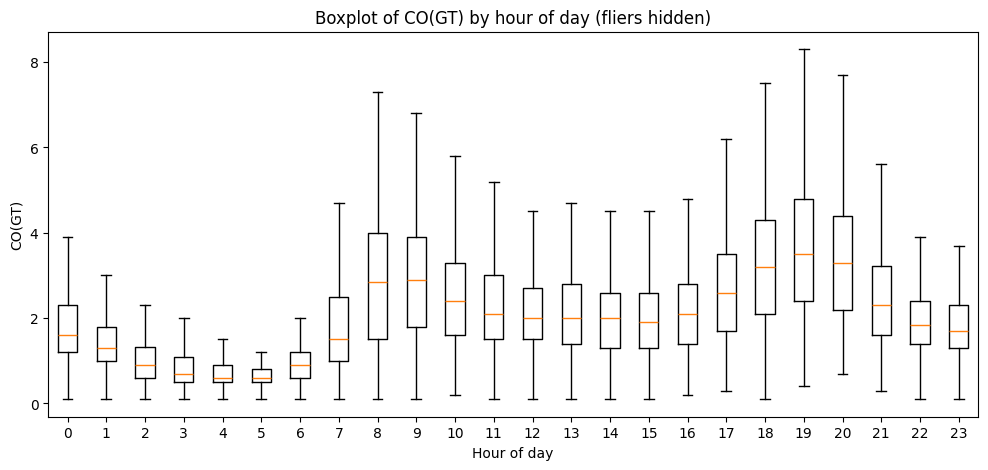

In [38]:
df['hour'] = df.index.hour
data_by_hour = [df.loc[df['hour']==h, target].dropna().values for h in range(24)]
labels = [str(h) for h in range(24) if len(df.loc[df['hour']==h, target].dropna()) > 0]
data_by_hour_nonempty = [arr for arr in data_by_hour if len(arr) > 0]

plt.figure(figsize=(12,5))
plt.boxplot(data_by_hour_nonempty, tick_labels=labels, showfliers=False)
plt.title(f"Boxplot of {target} by hour of day (fliers hidden)")
plt.xlabel("Hour of day")
plt.ylabel(target)
plt.show()

## Correlation matrix (numeric columns)

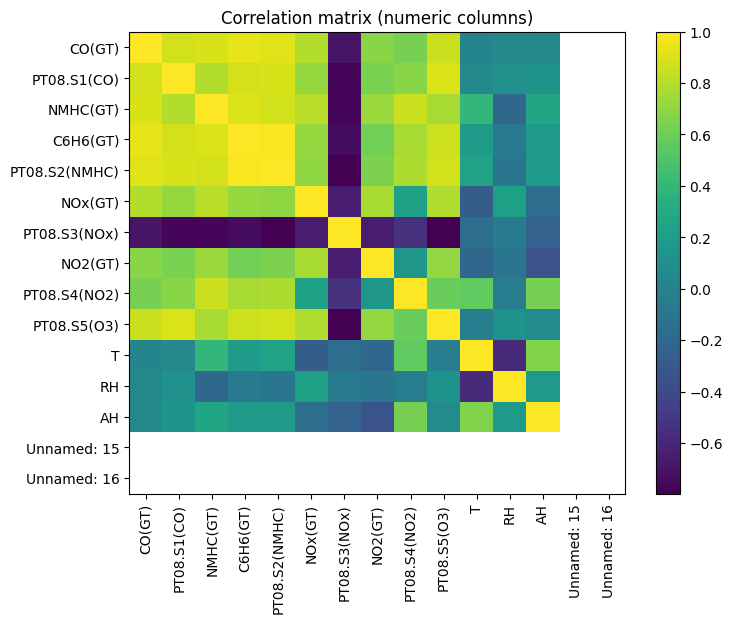

In [26]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix (numeric columns)")
plt.show()


## Cleaned file

In [29]:
df.to_csv("AirQuality_cleaned.csv", index=True)